<a href="https://colab.research.google.com/github/naserjawas/TorchUp/blob/main/TorchUp_LabKC_Sesi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environtment Setup dan Checking

## Mengecek Pytorch

In [ ]:
import torch

print(torch.__version__)
print(torch.mps.is_available())
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'CPU')

2.9.0+cu128
False
True
Tesla T4


In [ ]:
x = torch.tensor([1, 2, 3])
print(x * 2)

tensor([2, 4, 6])


## PyTorch Overview

In [ ]:
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
print(x)
print(f"X shape: {x.shape}")

tensor([[1, 2],
        [3, 4],
        [5, 6]])
X shape: torch.Size([3, 2])


In [ ]:
x = torch.tensor([1, 2, 3])
print(x)
print(type(x))

tensor([1, 2, 3])
<class 'torch.Tensor'>


# Dataset & Dataloader

## Dataset

In [ ]:
from torch.utils.data import Dataset

class SimpleDataset(Dataset):
    def __init__(self):
        self.data = [
            ([1.0, 2.0], 0),
            ([2.0, 1.0], 1),
            ([3.0, 4.0], 0),
            ([4.0, 2.0], 1),
            ([1.0, 3.0], 0),
            ([4.0, 1.0], 1),
        ]

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x, y = self.data[idx]

        return torch.tensor(x), torch.tensor(y)

In [ ]:
dataset = SimpleDataset()

print(len(dataset))
print(dataset[1])

6
(tensor([2., 1.]), tensor(1))


## Dataloader

In [ ]:
!curl -L -o deepweeds.zip\
  https://www.kaggle.com/api/v1/datasets/download/imsparsh/deepweeds

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  470M  100  470M    0     0   118M      0  0:00:03  0:00:03 --:--:--  129M


In [ ]:
!unzip 'deepweeds.zip' -d '/content/DeepWeeds/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/DeepWeeds/images/20180109-072434-2.jpg  
  inflating: /content/DeepWeeds/images/20180109-072438-1.jpg  
  inflating: /content/DeepWeeds/images/20180109-072442-2.jpg  
  inflating: /content/DeepWeeds/images/20180109-072448-1.jpg  
  inflating: /content/DeepWeeds/images/20180109-072451-2.jpg  
  inflating: /content/DeepWeeds/images/20180109-072501-2.jpg  
  inflating: /content/DeepWeeds/images/20180109-072502-1.jpg  
  inflating: /content/DeepWeeds/images/20180109-072510-2.jpg  
  inflating: /content/DeepWeeds/images/20180109-072512-1.jpg  
  inflating: /content/DeepWeeds/images/20180109-072518-2.jpg  
  inflating: /content/DeepWeeds/images/20180109-072524-1.jpg  
  inflating: /content/DeepWeeds/images/20180109-072527-2.jpg  
  inflating: /content/DeepWeeds/images/20180109-072534-1.jpg  
  inflating: /content/DeepWeeds/images/20180109-072536-2.jpg  
  inflating: /content/DeepWeeds/images/20180109-072543-1.jpg  
  in

In [ ]:
from torch.utils.data import DataLoader

dataloader = DataLoader(dataset, batch_size=3, shuffle=False)

for i, batch in enumerate(dataloader):
    x, y = batch
    print(f"Batch ke-{i+1}")
    print(f"x: {x}")
    print(f"y: {y}")
    print()

Batch ke-1
x: tensor([[1., 2.],
        [2., 1.],
        [3., 4.]])
y: tensor([0, 1, 0])

Batch ke-2
x: tensor([[4., 2.],
        [1., 3.],
        [4., 1.]])
y: tensor([1, 0, 1])



# Menggunakan Dataset Standar

In [ ]:
import torchvision
from torchvision import transforms

cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

trainloader = torch.utils.data.DataLoader(cifar_train, batch_size=8, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(cifar_test, batch_size=8, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



100%|██████████| 170M/170M [00:03<00:00, 43.1MB/s]


torch.Size([3, 32, 32])
(32, 32, 3)


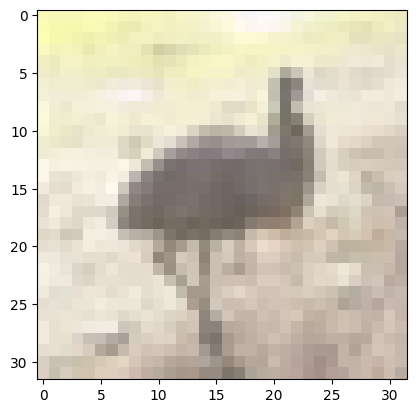

torch.Size([3, 32, 32])
(32, 32, 3)


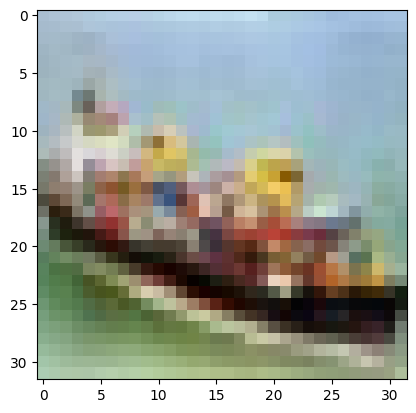

torch.Size([3, 32, 32])
(32, 32, 3)


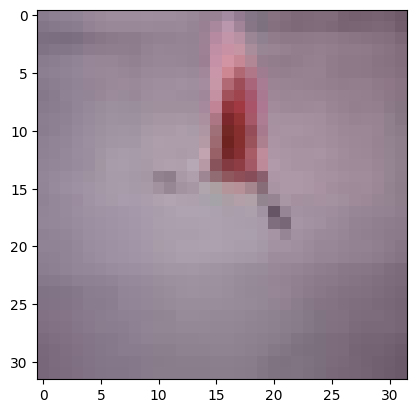

torch.Size([3, 32, 32])
(32, 32, 3)


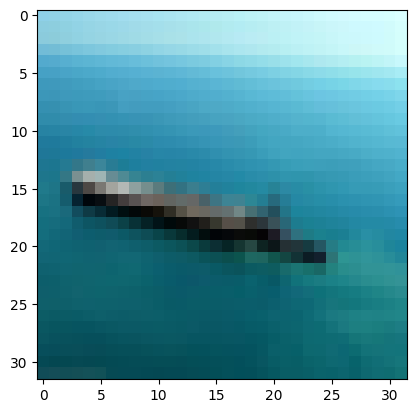

torch.Size([3, 32, 32])
(32, 32, 3)


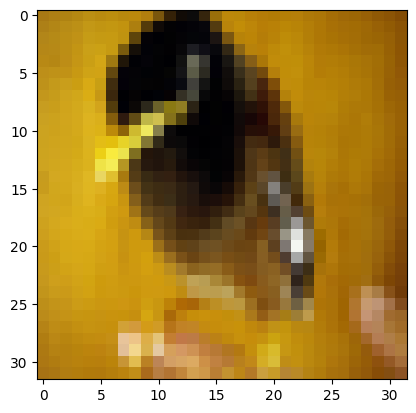

torch.Size([3, 32, 32])
(32, 32, 3)


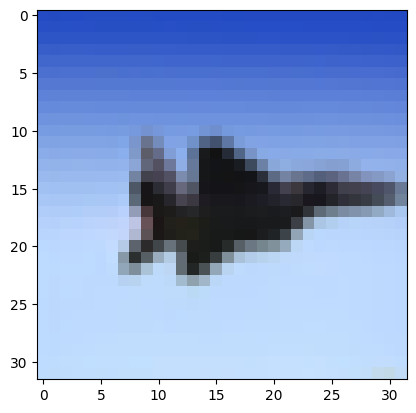

torch.Size([3, 32, 32])
(32, 32, 3)


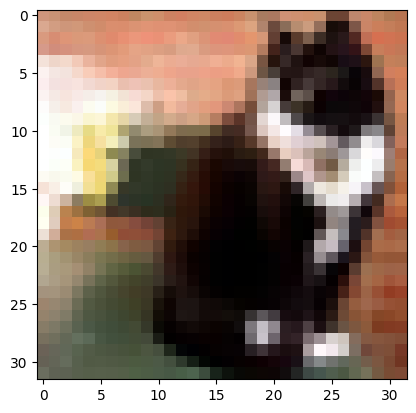

torch.Size([3, 32, 32])
(32, 32, 3)


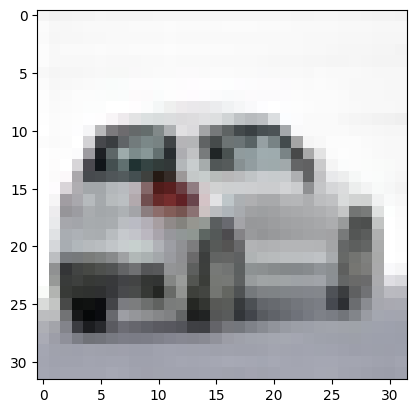

Batch ke-1: ['bird', 'ship', 'bird', 'ship', 'bird', 'plane', 'cat', 'car']


In [ ]:
import matplotlib.pyplot as plt

def imshow(img):
    print(img.shape)
    img = img.numpy().transpose((1, 2, 0))
    print(img.shape)
    plt.imshow(img)
    plt.show()

for i, data in enumerate(trainloader):
    images, labels = data
    for image in images:
        imshow(image)
    # imshow(torchvision.utils.make_grid(images))
    labels = [classes[label] for label in labels]
    print(f"Batch ke-{i+1}: {labels}")
    break

# Menggunakan Dataset Custom 1

Download datasetnya di sini: [dataset](https://www.kaggle.com/datasets/imsparsh/deepweeds)

## Import Google Drive dan Extract Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/datasets/DeepWeeds/archive.zip' -d '/content/DeepWeeds/'

Archive:  /content/drive/MyDrive/datasets/DeepWeeds/archive.zip
replace /content/DeepWeeds/images/20160928-140314-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd

data = pd.read_csv('/content/DeepWeeds/labels/labels.csv')
data.head()

,Filename,Label,Species
0,20160928-140314-0.jpg,0,Chinee apple
1,20160928-140337-0.jpg,0,Chinee apple
2,20160928-140731-0.jpg,0,Chinee apple
3,20160928-140747-0.jpg,0,Chinee apple
4,20160928-141107-0.jpg,0,Chinee apple


## Custom Dataset Class

In [ ]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset

class DeepWeedsDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        imgname = self.data.iloc[idx]['Filename']
        imglabel = self.data.iloc[idx]['Label']
        species = self.data.iloc[idx]['Species']

        img_path = os.path.join(self.root_dir, imgname)
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, imglabel

## Transform

In [ ]:
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(
    #     mean=[0.485, 0.456, 0.406],
    #     std=[0.229, 0.224, 0.225]
    # )
])

## DataLoader dan Split

In [ ]:
from torch.utils.data import DataLoader

dataset = DeepWeedsDataset(
    csv_file='DeepWeeds/labels/labels.csv',
    root_dir='DeepWeeds/images',
    transform=transform
)

In [ ]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



## Show sample image

In [ ]:
images, labels = next(iter(train_loader))
print(images.shape)
print(labels.shape)

torch.Size([32, 3, 224, 224])
torch.Size([32])


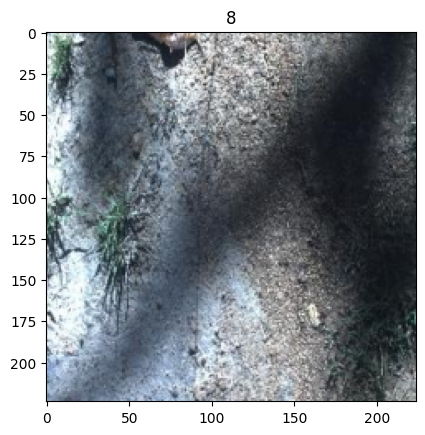

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[0].permute(1, 2, 0))
plt.title(labels[0].item())
plt.show()

# Menggunakan Dataset Custom 2

Download datasetnya di sini: [dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [ ]:
import pandas as pd

data = pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Custom Dataset Class

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, random_split

class PimaDataset(Dataset):
    def __init__(self, csv_file):
        df = pd.read_csv(csv_file)

        self.X = torch.tensor(
            df.iloc[:, :-1].values,
            dtype=torch.float32
        )

        self.y = torch.tensor(
            df.iloc[:, -1].values,
            dtype=torch.float32
        )

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

## DataLoader dan Split

In [ ]:
from torch.utils.data import DataLoader

dataset = PimaDataset(csv_file='/content/diabetes.csv')

In [ ]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=3, shuffle=False)

## Show Sample

In [ ]:
for X_batch, y_batch in train_loader:
    print(f"X batch shape: {X_batch.shape}")
    print(f"y batch shape: {y_batch.shape}")
    print(X_batch)
    print(y_batch)
    break

X batch shape: torch.Size([3, 8])
y batch shape: torch.Size([3])
tensor([[3.0000e+00, 1.7300e+02, 8.4000e+01, 3.3000e+01, 4.7400e+02, 3.5700e+01,
         2.5800e-01, 2.2000e+01],
        [8.0000e+00, 1.2600e+02, 8.8000e+01, 3.6000e+01, 1.0800e+02, 3.8500e+01,
         3.4900e-01, 4.9000e+01],
        [3.0000e+00, 8.2000e+01, 7.0000e+01, 0.0000e+00, 0.0000e+00, 2.1100e+01,
         3.8900e-01, 2.5000e+01]])
tensor([1., 0., 0.])


# Menggunakan Dataset Custom 3

Download datasetnya di sini: [dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

In [ ]:
import pandas as pd

data = pd.read_csv('/content/spam.csv', encoding="cp1252")
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


## Build Vocabulary Function

In [ ]:
def build_vocab(texts):
    vocab = {"<PAD>": 0, "<UNK>": 1}

    for text in texts:
        for word in text.lower().split():
            if word not in vocab:
                vocab[word] = len(vocab)

    return vocab

vocab = build_vocab(data["v2"])
print("Vocab size:", len(vocab))


Vocab size: 13498


## Custom Dataset Class

In [ ]:
class SMSDataset(Dataset):
    def __init__(self, dataframe, vocab):
        self.df = dataframe
        self.vocab = vocab
        self.label_map = {"ham": 0, "spam": 1}

    def __len__(self):
        return len(self.df)

    def encode_text(self, text):
        return [
            self.vocab.get(word, self.vocab["<UNK>"])
            for word in text.lower().split()
        ]

    def __getitem__(self, idx):
        text = self.df.iloc[idx]["text"]
        label = self.label_map[self.df.iloc[idx]["label"]]

        encoded = self.encode_text(text)

        return torch.tensor(encoded), torch.tensor(label)


In [ ]:
def collate_fn(batch):
    texts, labels = zip(*batch)

    max_len = max(len(t) for t in texts)

    padded_texts = []
    for t in texts:
        padded = torch.cat([
            t,
            torch.zeros(max_len - len(t), dtype=torch.long)
        ])
        padded_texts.append(padded)

    padded_texts = torch.stack(padded_texts)
    labels = torch.tensor(labels)

    return padded_texts, labels


## DataLoader dan Split

In [ ]:
from torch.utils.data import random_split

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=4, shuffle=False, collate_fn=collate_fn)

## Show Sample

In [ ]:
for texts, labels in train_loader:
    print(f"Texts shape: {texts.shape}")
    print(f"Texts: {texts}")
    print(f"Labels: {labels}")
    break


Texts shape: torch.Size([4, 8])
Texts: tensor([[  5.0000, 110.0000,  68.0000,   0.0000,   0.0000,  26.0000,   0.2920,
          30.0000],
        [  2.0000, 122.0000,  76.0000,  27.0000, 200.0000,  35.9000,   0.4830,
          26.0000],
        [  1.0000,  89.0000,  24.0000,  19.0000,  25.0000,  27.8000,   0.5590,
          21.0000],
        [  9.0000, 119.0000,  80.0000,  35.0000,   0.0000,  29.0000,   0.2630,
          29.0000]])
Labels: tensor([0., 0., 0., 1.])
